In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
#to import dataset
df=pd.read_csv('pima-indians.csv')
df.head() 

,preg,plas,pres,skin,test,mass,pedi,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#to select first 3 column
tempdf=df[['preg','plas','pres']]
tempdf.head()

,preg,plas,pres
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   label   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
label      int64
dtype: object

In [6]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
label    0
dtype: int64

In [7]:
# to describe data
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# diabetic patient below age of 40 years
resultdf=df[df.age<40]
resultdf.head()

,preg,plas,pres,skin,test,mass,pedi,age,label
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [20]:
# test is greater then 500 mass >30
resdf=df.loc[(df.test>500) & (df.mass>30)]
resdf

,preg,plas,pres,skin,test,mass,pedi,age,label
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
286,5,155,84,44,545,38.7,0.619,34,0
409,1,172,68,49,579,42.4,0.702,28,1
655,2,155,52,27,540,38.7,0.240,25,1
753,0,181,88,44,510,43.3,0.222,26,1


In [29]:
#calculation of pearson coef.
tem=df.head(50)
tem.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,label
preg,1.000000,0.130018,0.169781,-0.416309,-0.336778,-0.189262,-0.247424,0.424263,0.005763
plas,0.130018,1.000000,0.193043,-0.053832,0.391687,0.191799,0.202754,0.376963,0.361333
pres,0.169781,0.193043,1.000000,0.066629,0.029166,0.160339,-0.030982,0.370155,0.072397
skin,-0.416309,-0.053832,0.066629,1.000000,0.413277,0.356439,0.293756,0.041375,0.339655
test,-0.336778,0.391687,0.029166,0.413277,1.000000,0.111848,0.070243,0.312339,0.279809
mass,-0.189262,0.191799,0.160339,0.356439,0.111848,1.000000,0.294135,0.005285,0.248838
pedi,-0.247424,0.202754,-0.030982,0.293756,0.070243,0.294135,1.000000,0.063148,0.220851
age,0.424263,0.376963,0.370155,0.041375,0.312339,0.005285,0.063148,1.000000,0.203539
label,0.005763,0.361333,0.072397,0.339655,0.279809,0.248838,0.220851,0.203539,1.000000


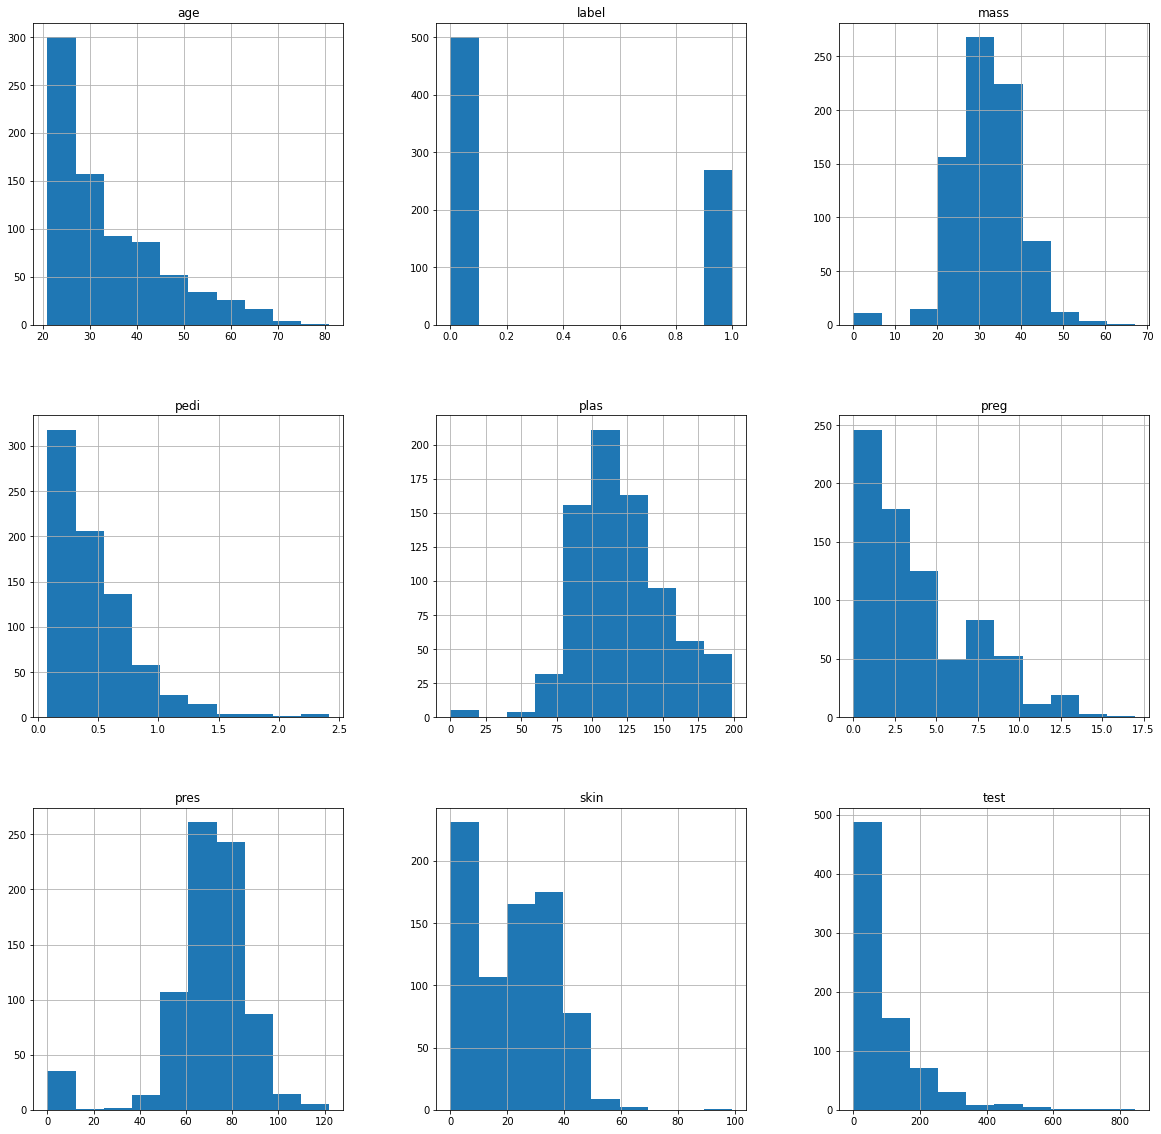

In [30]:
# plotting
df.hist(figsize=(20,20))
plt.show()

Text(0, 0.5, 'Preg')

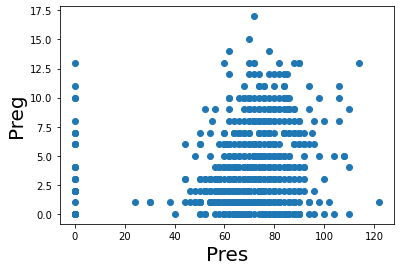

In [34]:
# scatterplot between pres and preg
plt.scatter(df.pres,df.preg)
plt.xlabel('Pres',fontsize=20)
plt.ylabel('Preg',fontsize=20)

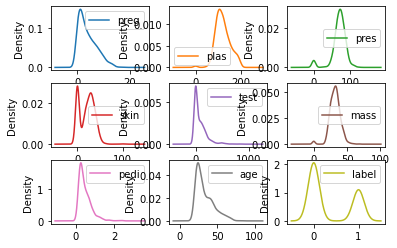

In [53]:
# Density Diagram
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [57]:
# skewness of all attributes
df.skew(axis=0)

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
label    0.635017
dtype: float64

In [59]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
x=df.drop('label',axis='columns')
y=df['label']

In [61]:
x

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [62]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [64]:
len(X_train)

614

In [65]:
#using Random forest algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
model.score(X_test,y_test)

0.7662337662337663

In [68]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

#### Confusion Matrix 

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[90,  9],
       [27, 28]], dtype=int64)

Text(69.0, 0.5, 'Truth')

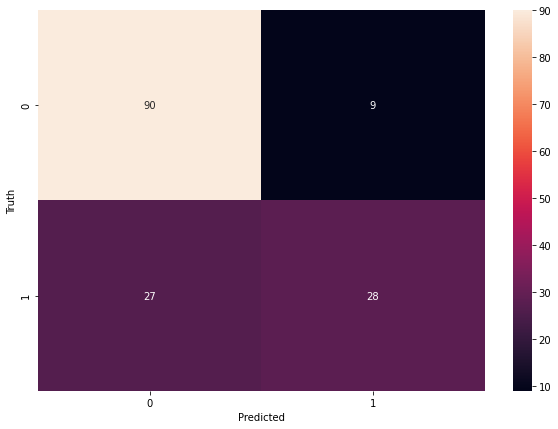

In [70]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')